Missing values in dataset:
 MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
dtype: int64

Simple Linear Regression Results:
MSE: 0.7091
RMSE: 0.8421
R² Score: 0.4589


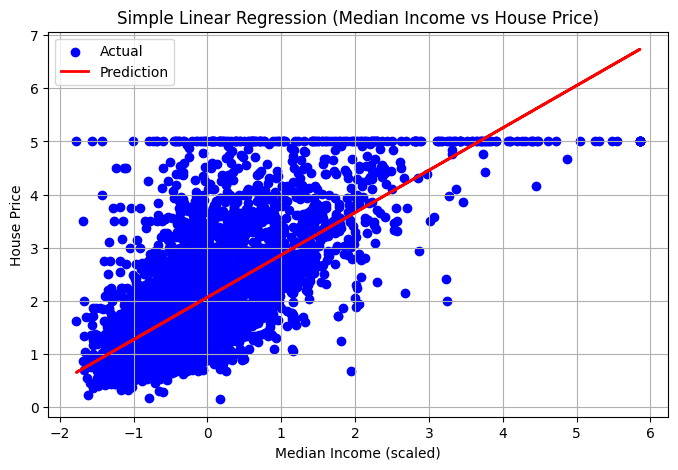


Multiple Linear Regression Results:
MSE: 0.5559
RMSE: 0.7456
R² Score: 0.5758

Model Comparison:
Simple R²: 0.4589 vs Multiple R²: 0.5758


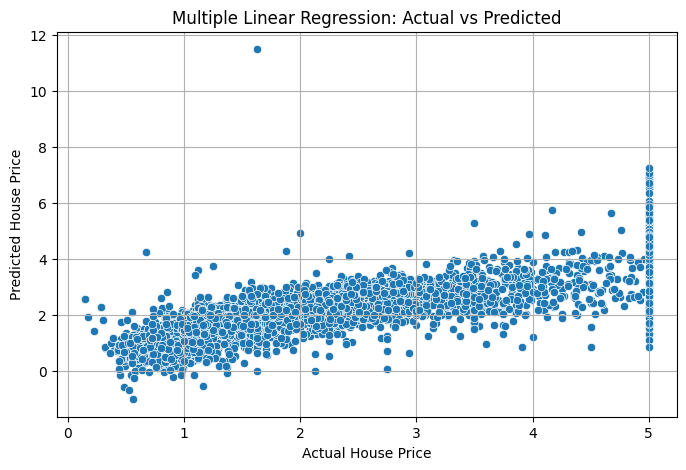

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load dataset
data = fetch_california_housing()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name='HouseValue')

# a. Preprocessing: Check for missing values
print("Missing values in dataset:\n", X.isnull().sum())

# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# b. Simple Linear Regression using one feature ('MedInc' = Median Income)
X_simple = X_scaled[:, [0]]  # Only one feature

# Train-test split
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_simple, y, test_size=0.2, random_state=42)

# Model
lr_simple = LinearRegression()
lr_simple.fit(X_train_s, y_train_s)

# Predictions
y_pred_s = lr_simple.predict(X_test_s)

# Evaluation
mse_s = mean_squared_error(y_test_s, y_pred_s)
rmse_s = np.sqrt(mse_s)
r2_s = r2_score(y_test_s, y_pred_s)

print("\nSimple Linear Regression Results:")
print(f"MSE: {mse_s:.4f}")
print(f"RMSE: {rmse_s:.4f}")
print(f"R² Score: {r2_s:.4f}")

# Visualization of regression line
plt.figure(figsize=(8, 5))
plt.scatter(X_test_s, y_test_s, color='blue', label='Actual')
plt.plot(X_test_s, y_pred_s, color='red', linewidth=2, label='Prediction')
plt.title("Simple Linear Regression (Median Income vs House Price)")
plt.xlabel("Median Income (scaled)")
plt.ylabel("House Price")
plt.legend()
plt.grid(True)
plt.show()

# c. Multiple Linear Regression (all features)
X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Model
lr_multi = LinearRegression()
lr_multi.fit(X_train_m, y_train_m)

# Predictions
y_pred_m = lr_multi.predict(X_test_m)

# Evaluation
mse_m = mean_squared_error(y_test_m, y_pred_m)
rmse_m = np.sqrt(mse_m)
r2_m = r2_score(y_test_m, y_pred_m)

print("\nMultiple Linear Regression Results:")
print(f"MSE: {mse_m:.4f}")
print(f"RMSE: {rmse_m:.4f}")
print(f"R² Score: {r2_m:.4f}")

# d. Compare Results
print("\nModel Comparison:")
print(f"Simple R²: {r2_s:.4f} vs Multiple R²: {r2_m:.4f}")

# e. Visualization: Actual vs Predicted (Multiple Linear Regression)
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_test_m, y=y_pred_m)
plt.xlabel("Actual House Price")
plt.ylabel("Predicted House Price")
plt.title("Multiple Linear Regression: Actual vs Predicted")
plt.grid(True)
plt.show()
